In [5]:
import math
import numpy as np
import PIL
import matplotlib.pyplot as plt
p,q=229,41
n=p*q
f_n=(p-1)*(q-1)
e=2
show_arr=np.zeros([64,64])
# encryp=0
def mul_Inverse(a,b):
    ri = [b,a]
    qi=[0,0]
    xi=[1,0]
    yi=[0,1]
    i=2
    while True:
        ri.append(ri[i-2]%ri[i-1])
        qi.append(ri[i-2]//ri[i-1])
        xi.append(xi[i-2]-qi[i]*xi[i-1])
        yi.append(yi[i-2]-qi[i]*yi[i-1])
        if ri[i]==1:
            break
        i+=1

    XI=(b+xi[-1])if(xi[-1]<0)else(xi[-1])
    YI=(b+yi[-1])if(yi[-1]<0)else(yi[-1])
    return YI
 
def encryp(m):
    global e,n,f_n
    f=0
    encr=0
    while(f==0):
        g=math.gcd(e,f_n)
        if(g==1):
            f=1
        else:
            e+=1
    encr=(m**e)%n
    # print("in en",m,e,encr,n,f_n)
    return encr

def decryp(en):
    global e,f_n,n
    d=mul_Inverse(e,f_n)
    pt=(en**d)%n
    return pt

# p=int(input("Enter p"))
# q=int(input("Enter q"))
# mess=int(input("Enter message"))
# n=p*q
# f_n=(p-1)*(q-1)
# e=2
# enc=encryp(mess)
# print("Encryption",enc)
# dec=decryp(enc)
# print("Decryption",dec)





img = PIL.Image.open('images_sm.jpg')
def encrypt_image(img):
    global show_arr
    gray_img = img.convert("L")
    imgArr = np.array(gray_img)
    flatten_array=imgArr.flatten()
    # print(flatten_array)
    shape=imgArr.shape
    new_arr=list()
    for i in range(0,len(flatten_array)):
        # print(type(flatten_array[i]))
        enc=encryp(int(flatten_array[i]))
        # print(flatten_array[i])
        # print(enc)
        new_arr.append(enc)
    show_arr=np.reshape(new_arr,(64,64))
    # print(show_arr)
    plt.imshow(show_arr)

def decrypt_image(dimg):
    flat_dec_array=dimg.flatten()
    # print(flat_dec_array)
    # shape=imgArr.shape
    dec_arr=list()
    for i in range(0,len(flat_dec_array)):
        dec=decryp(int(flat_dec_array[i]))
        # print(dec)
        dec_arr.append(dec)
    showd_arr=np.reshape(dec_arr,(64,64))
    # print(showd_arr)
    plt.imshow(showd_arr)
    # print(p,q,n,f_n,e)


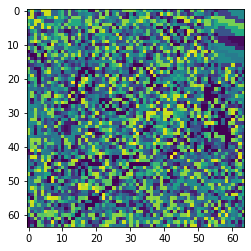

In [6]:
encrypt_image(img)

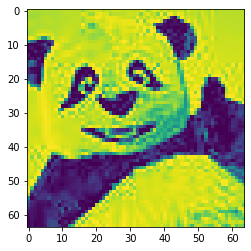

In [4]:
decrypt_image(show_arr)